In [1]:
import pandas as pd
from pyfolio.timeseries import perf_stats
%matplotlib inline

/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [2]:
df = pd.read_csv('/home/tomek/ib_tools/blotter/backtest_2019-11-08_22-39.csv')
df['realizedPNL_net'] = df['realizedPNL'] - 3.02
df['cumsum'] = df.realizedPNL_net.cumsum()
df['result'] = 100000 + df['cumsum']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df

,sys_time,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,com_sys_time,realizedPNL_net,cumsum,result
time,,,,,,,,,,,,,,,,
2018-02-09 09:28:00,2019-11-08 22:41:04.129398,GCZ9,SELL,1,1316.150,[1],1,entry,1,1.3,USD,0.0,2019-11-08 22:41:04.129520,-3.02,-3.02,99996.98
2018-02-09 13:31:00,2019-11-08 22:41:04.496455,GCZ9,BUY,1,1318.880,[2],2,stop-out,2,1.3,USD,-273.0,2019-11-08 22:41:04.496506,-276.02,-279.04,99720.96
2018-02-09 13:45:00,2019-11-08 22:41:04.547793,YM DEC 19,SELL,1,23822.100,[3],3,entry,3,1.3,USD,0.0,2019-11-08 22:41:04.547921,-3.02,-282.06,99717.94
2018-02-09 14:10:00,2019-11-08 22:41:04.626944,CLZ9,SELL,1,60.354,[4],5,entry,4,1.3,USD,0.0,2019-11-08 22:41:04.627054,-3.02,-285.08,99714.92
2018-02-09 14:39:00,2019-11-08 22:41:04.778000,YM DEC 19,BUY,1,23991.700,[5],4,stop-out,5,1.3,USD,-848.0,2019-11-08 22:41:04.778050,-851.02,-1136.10,98863.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-01 14:01:00,2019-11-09 00:40:02.804454,CLZ9,BUY,1,54.849,[4406],5081,entry,4406,1.3,USD,0.0,2019-11-09 00:40:02.805350,-3.02,74710.13,174710.13
2019-11-01 14:20:00,2019-11-09 00:40:03.453655,NQZ9,BUY,1,8127.975,[4407],5083,entry,4407,1.3,USD,0.0,2019-11-09 00:40:03.454567,-3.02,74707.11,174707.11
2019-11-01 14:36:00,2019-11-09 00:40:04.127382,YM DEC 19,BUY,1,27132.100,[4408],5085,entry,4408,1.3,USD,0.0,2019-11-09 00:40:04.128257,-3.02,74704.09,174704.09


In [3]:
len(df)

4410

In [4]:
df.realizedPNL.sum()

87728.25

In [5]:
df.realizedPNL_net.sum()

74410.05000000002

In [6]:
returns = pd.DataFrame()
returns['dollars'] = df['result'].resample('D').last()
returns.loc[returns.index[0] - pd.Timedelta(days=1), 'dollars'] = 100000
returns.sort_index(inplace=True)
returns.dollars.fillna(method='ffill', inplace=True)
returns['returns'] = returns['dollars'].pct_change()
returns

,dollars,returns
time,,
2018-02-08,100000.00,NaN
2018-02-09,92380.04,-0.076200
2018-02-10,92380.04,0.000000
2018-02-11,92380.04,0.000000
2018-02-12,90879.57,-0.016242
...,...,...
2019-10-28,172531.89,-0.001540
2019-10-29,175293.19,0.016005
2019-10-30,176212.47,0.005244


In [7]:
perf_stats(returns['returns'])

Annual return          0.248311
Cumulative returns     0.744100
Annual volatility      0.289937
Sharpe ratio           0.908474
Calmar ratio           1.395312
Stability              0.864933
Max drawdown          -0.177961
Omega ratio            1.220219
Sortino ratio          1.693531
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.613480
Daily value at risk   -0.035483
dtype: float64

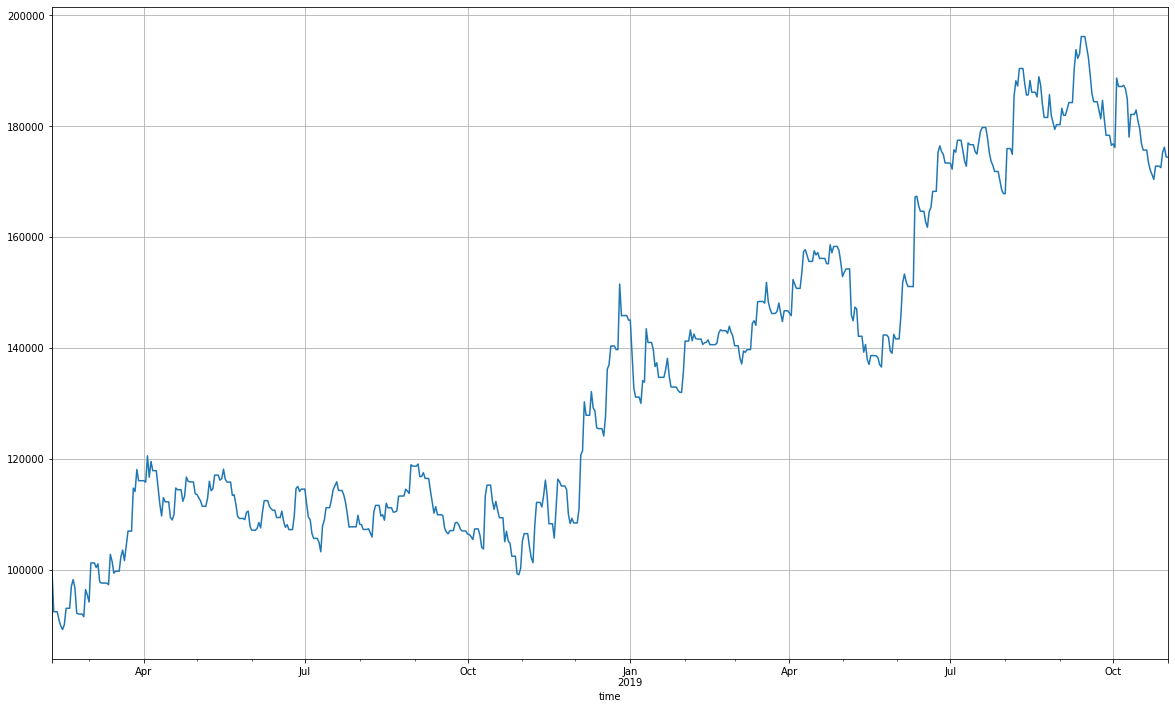

In [8]:
returns['dollars'].plot(figsize=(20,12), grid=True);

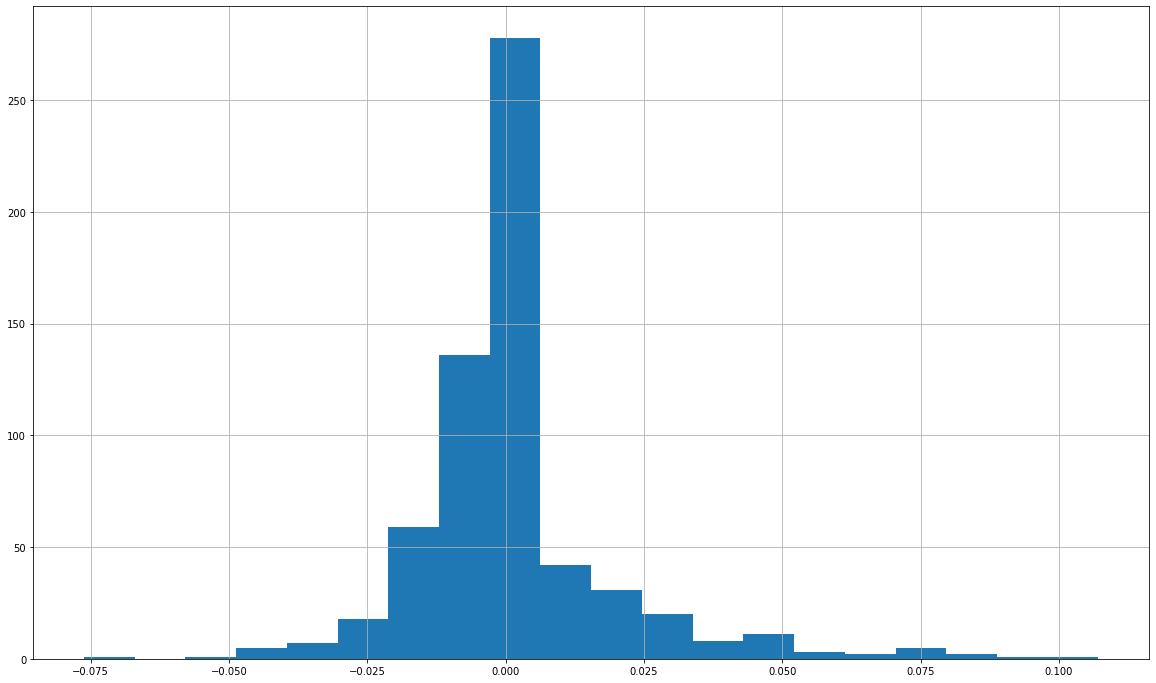

In [9]:
returns['returns'].hist(bins=20, figsize=(20,12), grid=True);

In [10]:
nq = df[df['contract'].str.startswith('NQ')]
nq

,sys_time,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,com_sys_time,realizedPNL_net,cumsum,result
time,,,,,,,,,,,,,,,,
2018-02-09 16:50:00,2019-11-08 22:41:06.173452,NQZ9,SELL,1,6300.250,[8],9,entry,8,1.3,USD,0.0,2019-11-08 22:41:06.173560,-3.02,-1470.16,98529.84
2018-02-09 16:55:00,2019-11-08 22:41:06.205638,NQZ9,BUY,1,6348.625,[13],12,stop-out,13,1.3,USD,-967.5,2019-11-08 22:41:06.205672,-970.52,-4052.01,95947.99
2018-02-09 18:05:00,2019-11-08 22:41:06.942871,NQZ9,SELL,1,6280.100,[16],19,entry,16,1.3,USD,0.0,2019-11-08 22:41:06.942999,-3.02,-4061.07,95938.93
2018-02-09 20:10:00,2019-11-08 22:41:08.418052,NQZ9,BUY,1,6325.850,[18],20,stop-out,18,1.3,USD,-915.0,2019-11-08 22:41:08.418109,-918.02,-5913.36,94086.64
2018-02-09 21:56:00,2019-11-08 22:41:09.482153,NQZ9,BUY,1,6427.825,[21],23,entry,21,1.3,USD,0.0,2019-11-08 22:41:09.482287,-3.02,-6726.42,93273.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-30 19:57:00,2019-11-09 00:39:15.793091,NQZ9,BUY,1,8078.525,[4385],5059,entry,4385,1.3,USD,0.0,2019-11-09 00:39:15.793926,-3.02,76489.55,176489.55
2019-10-31 15:24:00,2019-11-09 00:39:37.219520,NQZ9,SELL,1,8059.375,[4398],5060,stop-out,4398,1.3,USD,-383.0,2019-11-09 00:39:37.219587,-386.02,74788.29,174788.29
2019-11-01 07:17:00,2019-11-09 00:39:55.292815,NQZ9,BUY,1,8120.525,[4402],5076,entry,4402,1.3,USD,0.0,2019-11-09 00:39:55.293652,-3.02,74170.71,174170.71


In [11]:
nq['realizedPNL'].sum()

42771.85

In [12]:
nq['realizedPNL_net'].sum()

40026.669999999984

In [13]:
df['symbol'] = df['contract'].str[:2]
df

,sys_time,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,com_sys_time,realizedPNL_net,cumsum,result,symbol
time,,,,,,,,,,,,,,,,,
2018-02-09 09:28:00,2019-11-08 22:41:04.129398,GCZ9,SELL,1,1316.150,[1],1,entry,1,1.3,USD,0.0,2019-11-08 22:41:04.129520,-3.02,-3.02,99996.98,GC
2018-02-09 13:31:00,2019-11-08 22:41:04.496455,GCZ9,BUY,1,1318.880,[2],2,stop-out,2,1.3,USD,-273.0,2019-11-08 22:41:04.496506,-276.02,-279.04,99720.96,GC
2018-02-09 13:45:00,2019-11-08 22:41:04.547793,YM DEC 19,SELL,1,23822.100,[3],3,entry,3,1.3,USD,0.0,2019-11-08 22:41:04.547921,-3.02,-282.06,99717.94,YM
2018-02-09 14:10:00,2019-11-08 22:41:04.626944,CLZ9,SELL,1,60.354,[4],5,entry,4,1.3,USD,0.0,2019-11-08 22:41:04.627054,-3.02,-285.08,99714.92,CL
2018-02-09 14:39:00,2019-11-08 22:41:04.778000,YM DEC 19,BUY,1,23991.700,[5],4,stop-out,5,1.3,USD,-848.0,2019-11-08 22:41:04.778050,-851.02,-1136.10,98863.90,YM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-01 14:01:00,2019-11-09 00:40:02.804454,CLZ9,BUY,1,54.849,[4406],5081,entry,4406,1.3,USD,0.0,2019-11-09 00:40:02.805350,-3.02,74710.13,174710.13,CL
2019-11-01 14:20:00,2019-11-09 00:40:03.453655,NQZ9,BUY,1,8127.975,[4407],5083,entry,4407,1.3,USD,0.0,2019-11-09 00:40:03.454567,-3.02,74707.11,174707.11,NQ
2019-11-01 14:36:00,2019-11-09 00:40:04.127382,YM DEC 19,BUY,1,27132.100,[4408],5085,entry,4408,1.3,USD,0.0,2019-11-09 00:40:04.128257,-3.02,74704.09,174704.09,YM


In [14]:
df.groupby('symbol').realizedPNL.sum()

symbol
CL       -3.80
ES    29048.15
GC    -1960.20
NQ    42771.85
YM    17872.25
Name: realizedPNL, dtype: float64

In [15]:
nq = df[df['symbol'] == 'NQ']

In [18]:
df.resample('D').last().price.count()

447

In [19]:
nq.price.count() / df.resample('D').last().price.count()

2.033557046979866